# Student Performance Indicator
#### Steps Involved in Machine Learning Project
- understand the Problem Statement
- Data Collection
- Data Checks to Perform
- EDA
- Data pre-processing
- Model training 
- Choose Best Model 


In [2]:
# Imports 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the csv file 
df = pd.read_csv("stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Checks
- Missing Values
- Check Duplicates 
- check data types
- check the no.of unique values 
- check statistics of dataset
- check various categories present in categorical column

In [6]:
# Missing values 
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
# Check duplicates
df.duplicated().sum()

0

In [9]:
# Check the data type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# check the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
# Check the statistics 
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
num_feature = []
categorical_feature = []

for feature in df.columns:
    if df[feature].dtype == 'O':  # Check if the datatype is object (string)
        print(f"Categories in {feature} will be: {df[feature].unique()}")
        categorical_feature.append(feature)
    else:
        num_feature.append(feature)
print(f"We have {len(num_feature)} Numerical Feature in the dataset : {num_feature}")
print(f"We have {len(categorical_feature)} Categorical Feature in the dataset : {categorical_feature}")

Categories in gender will be: ['female' 'male']
Categories in race_ethnicity will be: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education will be: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch will be: ['standard' 'free/reduced']
Categories in test_preparation_course will be: ['none' 'completed']
We have 3 Numerical Feature in the dataset : ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical Feature in the dataset : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [19]:
# Add colum Named Total_score amd Average  to the datast
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['Total_score'] /3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
# How many students got full marks 

maths_full = df[df['math_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

print(f"Number of students with full marks with maths: {maths_full}")
print(f"Number of students with full marks with reading: {reading_full}")
print(f"Number of students with full marks with writing : {writing_full}")

Number of students with full marks with maths: 7
Number of students with full marks with reading: 17
Number of students with full marks with writing : 14


In [24]:
# How many students got less than 20

maths_full = df[df['math_score'] <= 20]['average'].count()
reading_full = df[df['reading_score'] <= 20]['average'].count()
writing_full = df[df['writing_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks with maths: {maths_full}")
print(f"Number of students with less than 20 with reading: {reading_full}")
print(f"Number of students with less than 20 with writing : {writing_full}")

Number of students with less than 20 marks with maths: 4
Number of students with less than 20 with reading: 1
Number of students with less than 20 with writing : 3


<Axes: xlabel='average', ylabel='Count'>

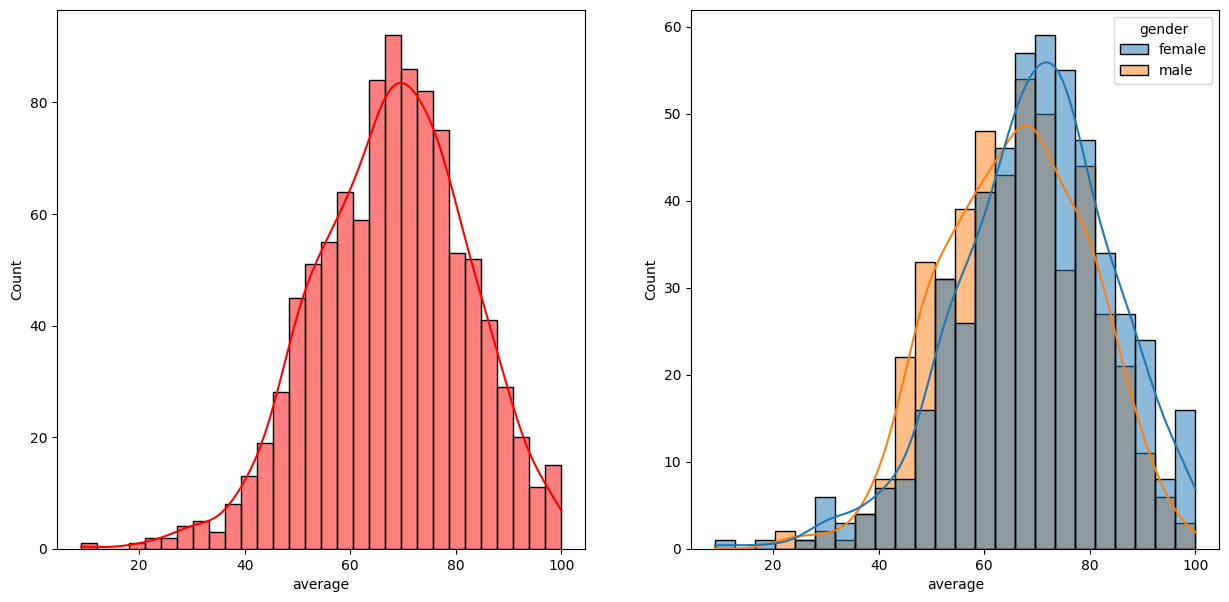

In [33]:
# Data Visualization

fig,axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='average',bins=30,kde=True,color='r',ax=axs[0])
sns.histplot(data=df,x='average',kde=True,hue='gender',ax=axs[1])


<Axes: xlabel='Total_score', ylabel='Count'>

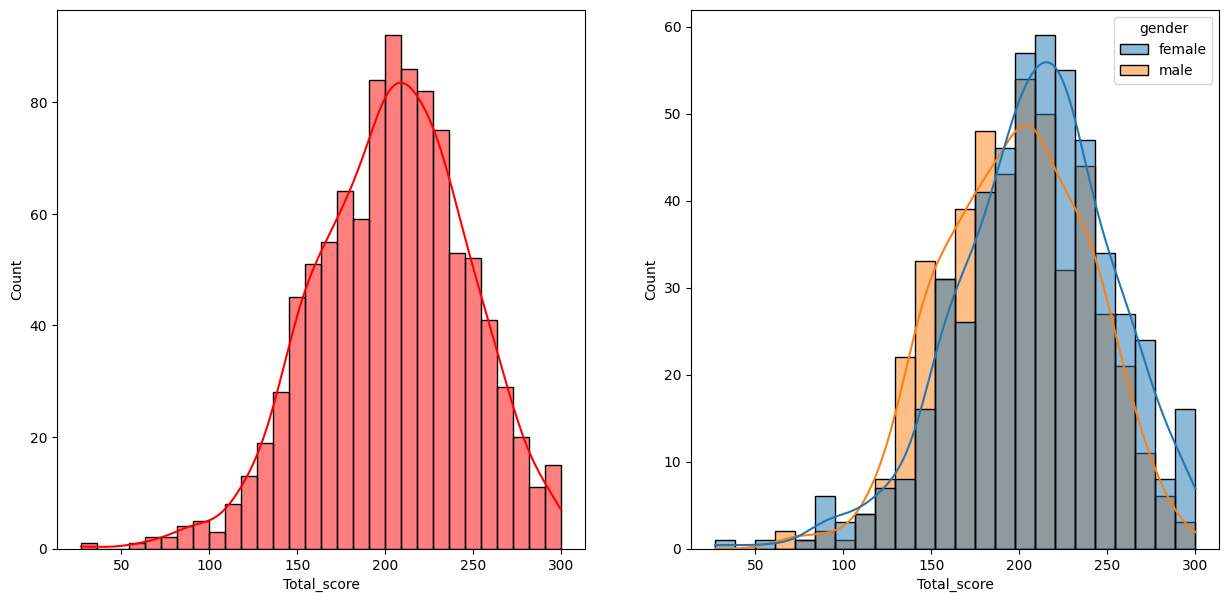

In [35]:
# Data Visualization

fig,axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='r',ax=axs[0])
sns.histplot(data=df,x='Total_score',kde=True,hue='gender',ax=axs[1])
